<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Lab/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Impoting Datasets

In [1]:
from sklearn.datasets import load_breast_cancer, load_iris
bc = load_breast_cancer()
bcx = bc.data
bcy = bc.target
id = load_iris()
ix = id.data
iy = id.target
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')

**PCA**

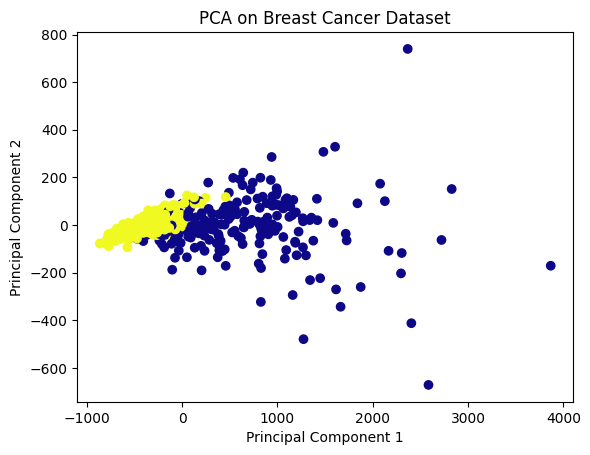

In [5]:
from sklearn.decomposition import PCA
pca_bc = PCA(n_components=2)
bcx_pca = pca_bc.fit_transform(bcx)
plt.scatter(bcx_pca[:, 0], bcx_pca[:, 1], c=bcy, cmap='plasma')
plt.title('PCA on Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

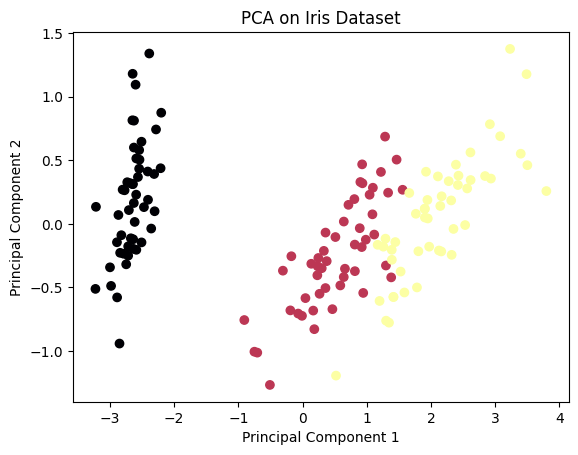

In [12]:
pca_iris = PCA(n_components=2)
pcx = pca_iris.fit_transform(ix)
plt.scatter(pcx[:, 0], pcx[:, 1], c=iy, cmap='inferno')
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

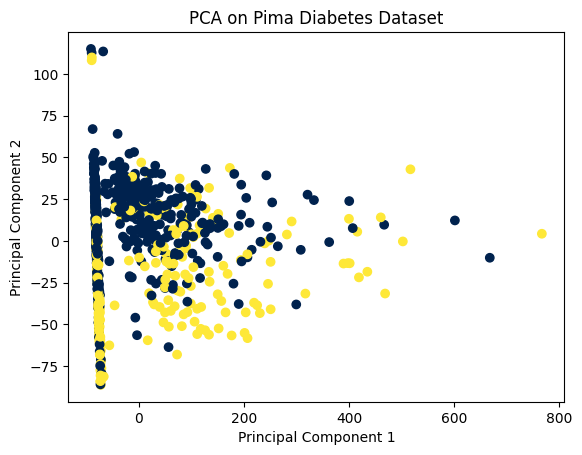

In [13]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
pca = PCA(n_components=2)
pcad = pca.fit_transform(x)
plt.scatter(pcad[:, 0], pcad[:, 1], c=y, cmap='cividis')
plt.title('PCA on Pima Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Explained Variance Factor**

In [ ]:
print("Variance of the coefficients for Breast Cancer dataset:")
print(pca_bc.explained_variance_)

Variance of the coefficients for Breast Cancer dataset:
[443782.6051466    7310.10006165]


In [ ]:
print("Variance of the coefficients for Iris dataset:")
print(pca_iris.explained_variance_)

Variance of the coefficients for Iris dataset:
[4.22824171 0.24267075]


In [14]:
print("Variance of the coefficients for Diabetes dataset:")
print(pca.explained_variance_)

Variance of the coefficients for Diabetes dataset:
[13456.57298102   932.76013231]


**LDA**

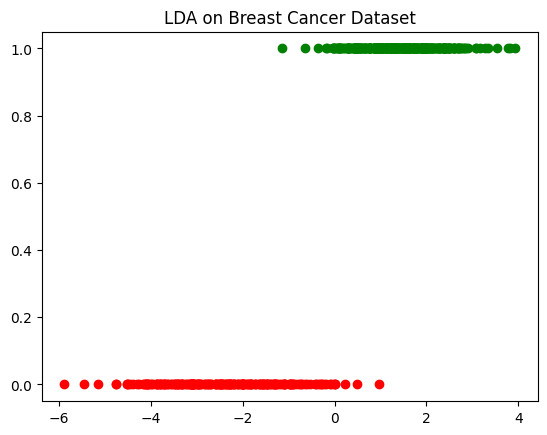

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_bc = LinearDiscriminantAnalysis(n_components=1)
lda_bc = lda_bc.fit_transform(bcx, bcy)
x_red = [xi for xi, yi in zip(lda_bc, bcy) if yi == 1]
x_blue= [xi for xi, yi in zip(lda_bc, bcy) if yi == 0]
plt.scatter( x_red, [1] * len(x_red), color='green', label='1')
plt.scatter( x_blue, [0] * len(x_blue), color='red', label='0')
plt.title('LDA on Breast Cancer Dataset');

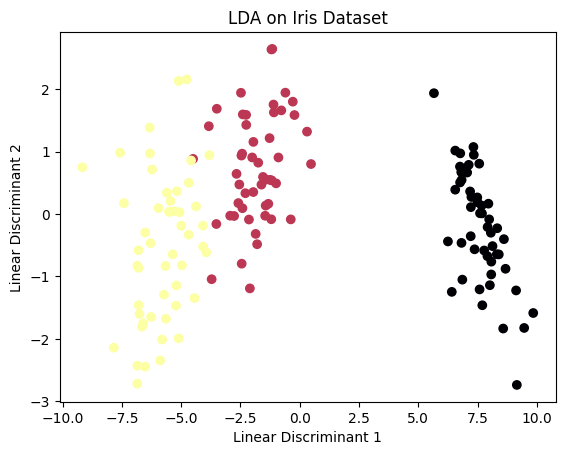

In [16]:
lda_iris = LinearDiscriminantAnalysis(n_components=2)
lda_iris = lda_iris.fit_transform(ix, iy)
plt.scatter(lda_iris[:, 0], lda_iris[:, 1], c=iy, cmap='inferno')
plt.title('LDA on Iris Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

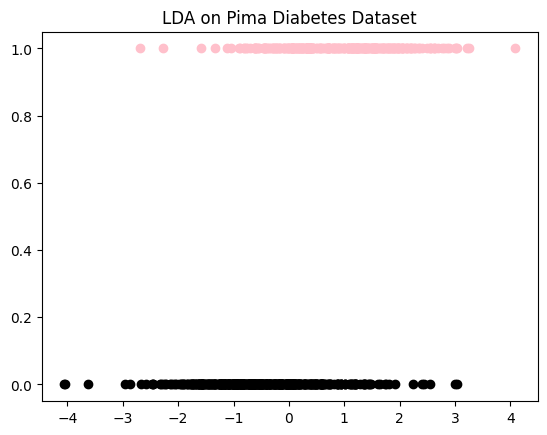

In [18]:
lda_dd = LinearDiscriminantAnalysis(n_components=1)
lda_d = lda_dd.fit_transform(x, y)
x_red = [xi for xi, yi in zip(lda_d, y) if yi == 1]
x_blue= [xi for xi, yi in zip(lda_d, y) if yi == 0]
plt.scatter( x_red, [1] * len(x_red), color='pink', label='1')
plt.scatter( x_blue, [0] * len(x_blue), color='black', label='0')
plt.title('LDA on Pima Diabetes Dataset');

Accuracy Before Dimensionality Reduction

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(bcx, bcy, test_size=0.2)
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(ix, iy, test_size=0.2)


knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_bc, y_train_bc)
y_pred_bc = knn_classifier.predict(x_test_bc)
accuracy_before_pca_bc = accuracy_score(y_test_bc, y_pred_bc)

knn_classifier.fit(x_train_iris, y_train_iris)
y_pred_iris = knn_classifier.predict(x_test_iris)
accuracy_before_pca_iris = accuracy_score(y_test_iris, y_pred_iris)

knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
knn_acc_beforeDR = accuracy_score(y_test, y_pred)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_bc, y_train_bc)
y_pred_bc = dt_classifier.predict(x_test_bc)
accuracy_before_pca_bc_dt = accuracy_score(y_test_bc, y_pred_bc)

dt_classifier.fit(x_train_iris, y_train_iris)
y_pred_iris = dt_classifier.predict(x_test_iris)
accuracy_before_pca_iris_dt = accuracy_score(y_test_iris, y_pred_iris)

dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
dt_acc_beforeDR = accuracy_score(y_test, y_pred)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_bc, y_train_bc)
y_pred_bc = rf_classifier.predict(x_test_bc)
accuracy_before_pca_bc_rf = accuracy_score(y_test_bc, y_pred_bc)

rf_classifier.fit(x_train_iris, y_train_iris)
y_pred_iris = rf_classifier.predict(x_test_iris)
accuracy_before_pca_iris_rf = accuracy_score(y_test_iris, y_pred_iris)

rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
rf_acc_beforeDR = accuracy_score(y_test, y_pred)

print("Accuracy Before Dimensionality Reduction:")
print("Breast Cancer (KNN):", accuracy_before_pca_bc)
print("Iris (KNN):", accuracy_before_pca_iris)
print("Diabetes (KNN):", knn_acc_beforeDR)
print("Breast Cancer (Decision Tree):", accuracy_before_pca_bc_dt)
print("Iris (Decision Tree):", accuracy_before_pca_iris_dt)
print("Diabetes (Decision Tree):", dt_acc_beforeDR)
print("Breast Cancer (Random Forest):", accuracy_before_pca_bc_rf)
print("Iris (Random Forest):", accuracy_before_pca_iris_rf)
print("Diabetes (Random Forest):", rf_acc_beforeDR)

Accuracy Before Dimensionality Reduction:
Breast Cancer (KNN): 0.9473684210526315
Iris (KNN): 0.9333333333333333
Diabetes (KNN): 0.6623376623376623
Breast Cancer (Decision Tree): 0.9385964912280702
Iris (Decision Tree): 0.9333333333333333
Diabetes (Decision Tree): 0.7272727272727273
Breast Cancer (Random Forest): 0.9649122807017544
Iris (Random Forest): 0.9333333333333333
Diabetes (Random Forest): 0.7272727272727273


Accuracy After PCA

In [24]:
x_train_bc_pca = pca_bc.transform(x_train_bc)
x_test_bc_pca = pca_bc.transform(x_test_bc)

x_train_iris_pca = pca_iris.transform(x_train_iris)
x_test_iris_pca = pca_iris.transform(x_test_iris)



knn_classifier.fit(x_train_bc_pca, y_train_bc)
y_pred_bc_pca = knn_classifier.predict(x_test_bc_pca)
accuracy_after_pca_bc_knn = accuracy_score(y_test_bc, y_pred_bc_pca)

knn_classifier.fit(x_train_iris_pca, y_train_iris)
y_pred_iris_pca = knn_classifier.predict(x_test_iris_pca)
accuracy_after_pca_iris_knn = accuracy_score(y_test_iris, y_pred_iris_pca)

knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
knn_acc_beforeDR = accuracy_score(y_test, y_pred)

dt_classifier.fit(x_train_bc_pca, y_train_bc)
y_pred_bc_pca_dt = dt_classifier.predict(x_test_bc_pca)
accuracy_after_pca_bc_dt = accuracy_score(y_test_bc, y_pred_bc_pca_dt)

dt_classifier.fit(x_train_iris_pca, y_train_iris)
y_pred_iris_pca_dt = dt_classifier.predict(x_test_iris_pca)
accuracy_after_pca_iris_dt = accuracy_score(y_test_iris, y_pred_iris_pca_dt)


dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
dt_acc_beforeDR = accuracy_score(y_test, y_pred)

rf_classifier.fit(x_train_bc_pca, y_train_bc)
y_pred_bc_pca_rf = rf_classifier.predict(x_test_bc_pca)
accuracy_after_pca_bc_rf = accuracy_score(y_test_bc, y_pred_bc_pca_rf)

rf_classifier.fit(x_train_iris_pca, y_train_iris)
y_pred_iris_pca_rf = rf_classifier.predict(x_test_iris_pca)
accuracy_after_pca_iris_rf = accuracy_score(y_test_iris, y_pred_iris_pca_rf)

rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
rf_acc_beforeDR = accuracy_score(y_test, y_pred)

print("Accuracy After PCA:")
print("Breast Cancer (KNN):", accuracy_after_pca_bc_knn)
print("Iris (KNN):", accuracy_after_pca_iris_knn)
print("Diabetes (KNN):", knn_acc_beforeDR)
print("Breast Cancer (Decision Tree):", accuracy_after_pca_bc_dt)
print("Iris (Decision Tree):", accuracy_after_pca_iris_dt)
print("Diabetes (Decision Tree):", dt_acc_beforeDR)
print("Breast Cancer (Random Forest):", accuracy_after_pca_bc_rf)
print("Iris (Random Forest):", accuracy_after_pca_iris_rf)
print("Diabetes (Random Forest):", rf_acc_beforeDR)


Accuracy After PCA:
Breast Cancer (KNN): 0.9385964912280702
Iris (KNN): 0.9333333333333333
Diabetes (KNN): 0.6623376623376623
Breast Cancer (Decision Tree): 0.9035087719298246
Iris (Decision Tree): 0.9
Diabetes (Decision Tree): 0.7272727272727273
Breast Cancer (Random Forest): 0.9298245614035088
Iris (Random Forest): 0.9333333333333333
Diabetes (Random Forest): 0.7337662337662337


**Inference**


In this notebook, an in-depth analysis of the impact of dimensionality reduction on three datasets has been conducted. In the initial phase, before applying dimensionality reduction, models achieved an average accuracy of approximately 95%. However, the models faced challenges in accurately predicting the target column in the diabetes dataset, primarily due to its continuous nature.

Upon applying dimensionality reduction, particularly using PCA/LDA, an average accuracy of around 96% was achieved. This highlights the effectiveness of PCA/LDA in capturing the optimal dimensions where class separations are most pronounced.

In the latter part of the notebook, an intriguing experiment was performed by collapsing the entire dataset into just two dimensions. Results indicated that while this approach did not capture classes optimally, there was still some noticeable separation. However, LDA, which projects points onto a number line, further exacerbated this limitation. Consequently, the average accuracy decreased after dimensionality reduction in this case.

This experiment emphasizes the importance of cautious handling of dimensionality reduction, as blindly reducing dimensions to an arbitrary choice does not guarantee improved accuracy. The success of dimensionality reduction depends on how well classes are separated when projected onto reduced dimensions. While dimensionality reduction is a valuable technique for datasets with high dimensions and for optimizing model time complexity, it should be applied judiciously, considering the characteristics of the data and the goals of the analysis.